In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv("final_dataset.csv")

In [3]:
df["Newdate"] = df["Newdate"].astype(str)

In [4]:
df["Newdate"] = df["Newdate"].apply(lambda x : datetime.strptime(x, '%Y%m%d%H'))

In [5]:
df = df.set_index('Newdate')

In [6]:
df.columns

Index(['Value', 'LON', 'LAT', 'PRESsfc', 'TMP2m_a', 'TMAX2m_g', 'TMIN2m_g',
       'DSWRFsfc_a', 'DSWRFavesfc_c', 'DSWRFavesfc_f', 'DUVBsfc_c',
       'DUVBsfc_f', 'Tdiff_a', 'RH2m_a', 'DPT2m_a', 'SPFH2m_a', 'QMAX2m_g',
       'QMIN2m_g', 'PRATEsfc_c', 'APCPsfc_b', 'APCPsfc_e', 'CRAINsfc_a',
       'CRAINavesfc_c', 'CRAINavesfc_f', 'VBetrag850', 'VBetrag30_0mb',
       'VBetrag10m_a', 'Omega500', 'Omega700', 'Omega850', 'Omega900',
       'Omega950', 'HPBLsfc_a', 'WindChill_a', 'VentIndex_a_1',
       'VentIndex_a_2', 'VentIndex_a_3', 'FogStabIndex', 'CAPEsfc',
       'CAPE180_0mb', 'CINsfc', 'CIN180_0mb', 'no4LFTXsfc', 'LFTXsfc',
       'PLI30_0mb', 'KOindex', 'Sigma700', 'CPRATsfc_c', 'ACPCPsfc_b',
       'ACPCPsfc_e', 'TCDCccll_a', 'SFEXCsfc_c', 'AdvT850', 'AdvT30_0mb',
       'Thetae850', 'T850', 'SHTFLsfc_a', 'SHTFLavesfc_c', 'SHTFLavesfc_f',
       'GFLUXsfc_a', 'GFLUXavesfc_c', 'GFLUXavesfc_f', 'TCDCclm_c',
       'TCDCblcll_c', 'TCDCclm_f', 'TCDCblcll_f'],
      dtype='object')

In [17]:
df.to_csv("cleaned_data_final.csv", index=True)

In [7]:
dataset = pd.read_csv("cleaned_data_final.csv", header=0, index_col=0)

In [8]:
drop_columns = ['LON', 'LAT',
       'DSWRFsfc_a', 'DSWRFavesfc_c', 'DSWRFavesfc_f', 'DUVBsfc_c',
       'DUVBsfc_f', 'Tdiff_a', 'RH2m_a', 'DPT2m_a', 'SPFH2m_a', 'QMAX2m_g',
       'QMIN2m_g', 'PRATEsfc_c', 'APCPsfc_b', 'APCPsfc_e', 'CRAINsfc_a',
       'CRAINavesfc_c', 'CRAINavesfc_f', 'VBetrag850', 'VBetrag30_0mb',
       'VBetrag10m_a', 'Omega500', 'Omega700', 'Omega850', 'Omega900',
       'Omega950', 'HPBLsfc_a', 'WindChill_a', 'VentIndex_a_1',
       'VentIndex_a_2', 'VentIndex_a_3', 'FogStabIndex', 'CAPEsfc',
       'CAPE180_0mb', 'CINsfc', 'CIN180_0mb', 'no4LFTXsfc', 'LFTXsfc',
       'PLI30_0mb', 'KOindex', 'Sigma700', 'CPRATsfc_c', 'ACPCPsfc_b',
       'ACPCPsfc_e', 'TCDCccll_a', 'SFEXCsfc_c', 'AdvT850', 'AdvT30_0mb',
       'Thetae850', 'T850', 'SHTFLsfc_a', 'SHTFLavesfc_c', 'SHTFLavesfc_f',
       'GFLUXsfc_a', 'GFLUXavesfc_c', 'GFLUXavesfc_f', 'TCDCclm_c',
       'TCDCblcll_c', 'TCDCclm_f', 'TCDCblcll_f']

In [9]:
dataset = dataset.drop(drop_columns,axis = 1)

In [10]:
dataset.columns

Index(['Value', 'PRESsfc', 'TMP2m_a', 'TMAX2m_g', 'TMIN2m_g'], dtype='object')

In [11]:
groups = [0, 1, 2, 3]

In [12]:
groups

[0, 1, 2, 3]

In [13]:
import numpy as np
import matplotlib.pyplot as plt

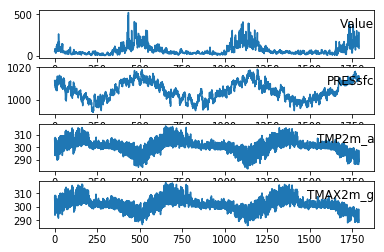

In [18]:
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [14]:
from pandas import DataFrame
from pandas import concat

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [15]:
values = dataset.values

In [16]:
values = values.astype('float32')

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [20]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaled

array([[0.09596928, 0.73670197, 0.69629574, 0.6635523 , 0.6387968 ],
       [0.11516314, 0.625     , 0.46723557, 0.46417427, 0.4046831 ],
       [0.15738963, 0.72226715, 0.31652355, 0.24299145, 0.35117054],
       ...,
       [0.5412668 , 0.8495445 , 0.43247795, 0.38317776, 0.31772614],
       [0.31094047, 0.7340431 , 0.22165203, 0.15264797, 0.23745918],
       [0.16506717, 0.8028145 , 0.17179489, 0.08099747, 0.19063663]],
      dtype=float32)

In [22]:
reframed = series_to_supervised(scaled, 1, 1)

In [23]:
reframed.shape

(1791, 10)

In [24]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.095969,0.736702,0.696296,0.663552,0.638797,0.115163,0.625000,0.467236,0.464174,0.404683
2,0.115163,0.625000,0.467236,0.464174,0.404683,0.157390,0.722267,0.316524,0.242991,0.351171
3,0.157390,0.722267,0.316524,0.242991,0.351171,0.099808,0.586628,0.731909,0.707166,0.648829
4,0.099808,0.586628,0.731909,0.707166,0.648829,0.078695,0.564213,0.362393,0.302181,0.367893
5,0.078695,0.564213,0.362393,0.302181,0.367893,0.063340,0.569530,0.310541,0.657321,0.321071
6,0.063340,0.569530,0.310541,0.657321,0.321071,0.074856,0.625000,0.715384,0.697819,0.668897
7,0.074856,0.625000,0.715384,0.697819,0.668897,0.069098,0.515579,0.490313,0.489097,0.444816
8,0.069098,0.515579,0.490313,0.489097,0.444816,0.057582,0.666035,0.354985,0.289721,0.371238
9,0.057582,0.666035,0.354985,0.289721,0.371238,0.069098,0.597649,0.532478,0.517134,0.471573
10,0.069098,0.597649,0.532478,0.517134,0.471573,0.172745,0.748482,0.363248,0.317758,0.404683


In [25]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)'],
      dtype='object')

In [26]:
cols_name = ['var2(t)','var3(t)','var4(t)','var5(t)']

In [27]:
reframed.drop(cols_name, axis=1, inplace=True)

In [28]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
1,0.095969,0.736702,0.696296,0.663552,0.638797,0.115163
2,0.115163,0.625000,0.467236,0.464174,0.404683,0.157390
3,0.157390,0.722267,0.316524,0.242991,0.351171,0.099808
4,0.099808,0.586628,0.731909,0.707166,0.648829,0.078695
5,0.078695,0.564213,0.362393,0.302181,0.367893,0.063340
6,0.063340,0.569530,0.310541,0.657321,0.321071,0.074856
7,0.074856,0.625000,0.715384,0.697819,0.668897,0.069098
8,0.069098,0.515579,0.490313,0.489097,0.444816,0.057582
9,0.057582,0.666035,0.354985,0.289721,0.371238,0.069098
10,0.069098,0.597649,0.532478,0.517134,0.471573,0.172745


In [29]:
values = reframed.values
n_train_hours = 1500
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]


# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(1500, 1, 5) (1500,) (291, 1, 5) (291,)


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

C:\Users\akars\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [31]:
from keras import optimizers

adam_optimizer = optimizers.Adam(lr = 1e-3, beta_1 = 0.9, beta_2 = 0.999)

In [32]:
model = Sequential()
model.add(LSTM(512, return_sequences=True, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(512, return_sequences=True, activation='relu'))
model.add(LSTM(512, return_sequences=True, activation='relu'))
model.add(LSTM(512))
model.add(Dense(1))
model.compile(loss='mae', optimizer=adam_optimizer)

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 512)            1060864   
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 512)            2099200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 512)            2099200   
_________________________________________________________________
lstm_4 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 7,358,977
Trainable params: 7,358,977
Non-trainable params: 0
_________________________________________________________________


Train on 1500 samples, validate on 291 samples
Epoch 1/100
 - 15s - loss: 0.0871 - val_loss: 0.0896
Epoch 2/100
 - 9s - loss: 0.0790 - val_loss: 0.0889
Epoch 3/100
 - 9s - loss: 0.0765 - val_loss: 0.0806
Epoch 4/100
 - 9s - loss: 0.0585 - val_loss: 0.0646
Epoch 5/100
 - 9s - loss: 0.0457 - val_loss: 0.0524
Epoch 6/100
 - 9s - loss: 0.0526 - val_loss: 0.0580
Epoch 7/100
 - 10s - loss: 0.0531 - val_loss: 0.0495
Epoch 8/100
 - 10s - loss: 0.0495 - val_loss: 0.0585
Epoch 9/100
 - 9s - loss: 0.0567 - val_loss: 0.0751
Epoch 10/100
 - 9s - loss: 0.0482 - val_loss: 0.0638
Epoch 11/100
 - 9s - loss: 0.0472 - val_loss: 0.0633
Epoch 12/100
 - 9s - loss: 0.0498 - val_loss: 0.0583
Epoch 13/100
 - 9s - loss: 0.0473 - val_loss: 0.0591
Epoch 14/100
 - 9s - loss: 0.0474 - val_loss: 0.0586
Epoch 15/100
 - 9s - loss: 0.0467 - val_loss: 0.0581
Epoch 16/100
 - 9s - loss: 0.0464 - val_loss: 0.0575
Epoch 17/100
 - 9s - loss: 0.0452 - val_loss: 0.0564
Epoch 18/100
 - 9s - loss: 0.0438 - val_loss: 0.0568
Epoch

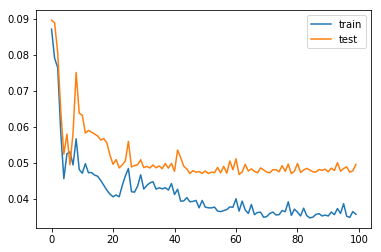

In [34]:
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [35]:
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

In [36]:
test_X

array([[[0.04606526, 0.3487854 , 0.625926  , 0.57943916, 0.67558575]],

       [[0.07293665, 0.28229523, 0.5165243 , 0.48909664, 0.5819397 ]],

       [[0.1209213 , 0.41755295, 0.48376083, 0.4236765 , 0.5618725 ]],

       ...,

       [[0.35700575, 0.81801224, 0.10455799, 0.34267902, 0.13377953]],

       [[0.5412668 , 0.8495445 , 0.43247795, 0.38317776, 0.31772614]],

       [[0.31094047, 0.7340431 , 0.22165203, 0.15264797, 0.23745918]]],
      dtype=float32)

In [37]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 41.250


In [38]:
dataset.corr(method='kendall')

,Value,PRESsfc,TMP2m_a,TMAX2m_g,TMIN2m_g
Value,1.000000,0.486816,-0.301682,-0.218689,-0.416382
PRESsfc,0.486816,1.000000,-0.342257,-0.244438,-0.478828
TMP2m_a,-0.301682,-0.342257,1.000000,0.641386,0.795416
TMAX2m_g,-0.218689,-0.244438,0.641386,1.000000,0.558930
TMIN2m_g,-0.416382,-0.478828,0.795416,0.558930,1.000000


In [163]:
dataset['Value'].corr(dataset['PRESsfc'])

0.6510129578954172

In [39]:
dataset.corr(method='pearson').style.format("{:2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Value,PRESsfc,TMP2m_a,TMAX2m_g,TMIN2m_g
Value,1.0,0.6510129578954189,-0.49459384808061524,-0.3227719757125889,-0.6463362998189367
PRESsfc,0.6510129578954189,1.0,-0.4754435185843084,-0.376881777516789,-0.6593296911114038
TMP2m_a,-0.49459384808061524,-0.4754435185843084,1.0,0.7601615728325983,0.9436638026433098
TMAX2m_g,-0.3227719757125889,-0.376881777516789,0.7601615728325983,1.0,0.7284969324958904
TMIN2m_g,-0.6463362998189367,-0.6593296911114038,0.9436638026433098,0.7284969324958904,1.0


In [40]:
print (yhat)

[[0.04886924]
 [0.06143816]
 [0.1082976 ]
 [0.07347441]
 [0.05132101]
 [0.05988574]
 [0.04941923]
 [0.06299721]
 [0.06101066]
 [0.08937389]
 [0.10380913]
 [0.05797222]
 [0.04196144]
 [0.07472455]
 [0.0796292 ]
 [0.03993652]
 [0.0382777 ]
 [0.04748719]
 [0.05660998]
 [0.05031371]
 [0.055729  ]
 [0.0412272 ]
 [0.05372262]
 [0.04563362]
 [0.05218535]
 [0.0612931 ]
 [0.05809059]
 [0.06606713]
 [0.07535713]
 [0.0790124 ]
 [0.0592689 ]
 [0.0875221 ]
 [0.08092871]
 [0.05678186]
 [0.06467876]
 [0.05577728]
 [0.06233693]
 [0.10782802]
 [0.03978654]
 [0.03634115]
 [0.03432911]
 [0.03024864]
 [0.03703252]
 [0.03445166]
 [0.04592812]
 [0.03801302]
 [0.06543746]
 [0.06070516]
 [0.06169926]
 [0.09588917]
 [0.07799909]
 [0.08317893]
 [0.04998393]
 [0.03445356]
 [0.03412394]
 [0.047219  ]
 [0.04050165]
 [0.0323557 ]
 [0.04439832]
 [0.03900323]
 [0.04442704]
 [0.04693362]
 [0.04953318]
 [0.04649648]
 [0.05561861]
 [0.0487398 ]
 [0.04947687]
 [0.04393021]
 [0.06223316]
 [0.03567952]
 [0.11789621]
 [0.09

In [41]:
print(len(yhat))

291


In [42]:
print(inv_yhat)

[ 26.460875   33.00928    57.423054   39.28017    27.738249   32.20047
  26.747417   33.821552   32.786556   47.563797   55.084557   31.20353
  22.861912   39.93149    42.486816   21.806925   20.942682   25.740826
  30.493803   27.213442   30.03481    22.479368   28.989483   24.775118
  28.18857    32.933704   31.265198   35.42098    40.261066   42.165462
  31.879095   46.59902    43.163864   30.583351   34.697636   30.059961
  33.47754    57.178402   21.728788   19.933737   18.885468   16.75954
  20.293941   18.949316   24.928549   20.804783   35.09292    32.627388
  33.145313   50.958263   41.637527   44.336224   27.041628   18.950302
  18.778574   25.6011     22.10136    17.85732    24.131527   21.32068
  24.146486   25.45242    26.80679    25.224667   29.977297   26.393435
  26.777449   23.887642   33.423477   19.589031   62.423927   50.938755
  37.06521    65.96396    53.73273    45.312256   42.714836   47.73718
  31.742823   33.548782   24.860287   30.07615    21.667604   22.4937

In [43]:
print(len(inv_yhat))

291


In [44]:
print(inv_y)

[ 39.         64.         47.999996   28.         37.         32.
  40.         36.         60.         68.         35.         20.
  47.         55.         21.         16.         27.         37.
  31.         30.         23.999998   35.         27.         27.
  40.         36.         38.         50.         52.         37.
  53.         51.         36.         40.         31.         40.
  66.         23.         20.         18.         19.         22.
  19.         29.         23.999998   38.         23.999998   38.
  59.         47.999996   45.         29.         21.         17.
  19.         21.         18.         27.         15.         25.
  31.         29.         26.         35.         31.         32.
  29.         41.         23.         72.         58.         43.
  69.         59.         49.         50.         53.         35.
  34.         28.         34.         23.         19.         20.
  29.         23.         27.         53.         40.         46.
  62.     